# Data Mining Projekt

Projekt von Magnus Jachnik im Rahmen der Vorlesung DDMI von Prof. Schicker WiSe2023/24
Im folgenden Projekt sollen Fettleibigkeitsklassen in Abhängigkeit von Gewohnheiten von Menschen in Südamerika dargestellt und anhand verschiedener Methoden vorhergesagt werden.



### Einbinden von Bibliotheken

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import phik
from sklearn.ensemble import RandomForestClassifier

### Einlesen des Datensatzes

In [26]:
# Dateipfad zum Datensatz
dataset_csv = "ObesityDataSet_raw_and_data_sinthetic.csv"

# Einlesen der Datei in ein DataFrame
df= pd.read_csv(dataset_csv)

# Ausgeben der ersten fünf Einträge 
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

### Daten, die keine Gewohnheiten sind, werden aus dem DataFrame entfernt

In [27]:
# Löschen der Spalten 
df.drop(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight'], axis=1, inplace = True)

# Ausgeben der ersten fünf Einträge
print(df.head())

  FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0   no   2.0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1   no   3.0  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2   no   2.0  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3   no   3.0  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4   no   2.0  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II  


### Für eine bessere Lesbarkeit werden die meisten Spalten umbenannt

In [28]:
# Erstellen eines Dictionarys mit den Umbenennungen
column_mapping = {'FAVC': 'frequent_consumption_high_caloric_food', 'FCVC': 'frequency_consumption_vegetables', 'NCP':'number_of_main_meals', 'CAEC': 'consumption_food_between_meals', 'CH2O': 'consumption_water_daily', 'CALC': 'consumption_of_alcohol', 'SCC':'calories_consumption_monitoring', 'FAF': 'physical_activity_frequency', 'TUE': 'time_using_technology_devices', 'MTRANS': 'transportation_used', 'NObeyesdad':'obesity_levels'}

# Umbenennen der Spalten
df_rename=df
df_rename.rename(columns=column_mapping, inplace=True)

# Ausgeben der ersten fünf Einträge
print(df_rename.head())

  frequent_consumption_high_caloric_food  frequency_consumption_vegetables  \
0                                     no                               2.0   
1                                     no                               3.0   
2                                     no                               2.0   
3                                     no                               3.0   
4                                     no                               2.0   

   number_of_main_meals consumption_food_between_meals SMOKE  \
0                   3.0                      Sometimes    no   
1                   3.0                      Sometimes   yes   
2                   3.0                      Sometimes    no   
3                   3.0                      Sometimes    no   
4                   1.0                      Sometimes    no   

   consumption_water_daily calories_consumption_monitoring  \
0                      2.0                              no   
1                     

### Um einen Überblick über den Datensatz zu bekommen wird für jede Spalte ein Balkendiagramm, das die Häufigkeit der einzelnen Werte anzeigt, erstellt.

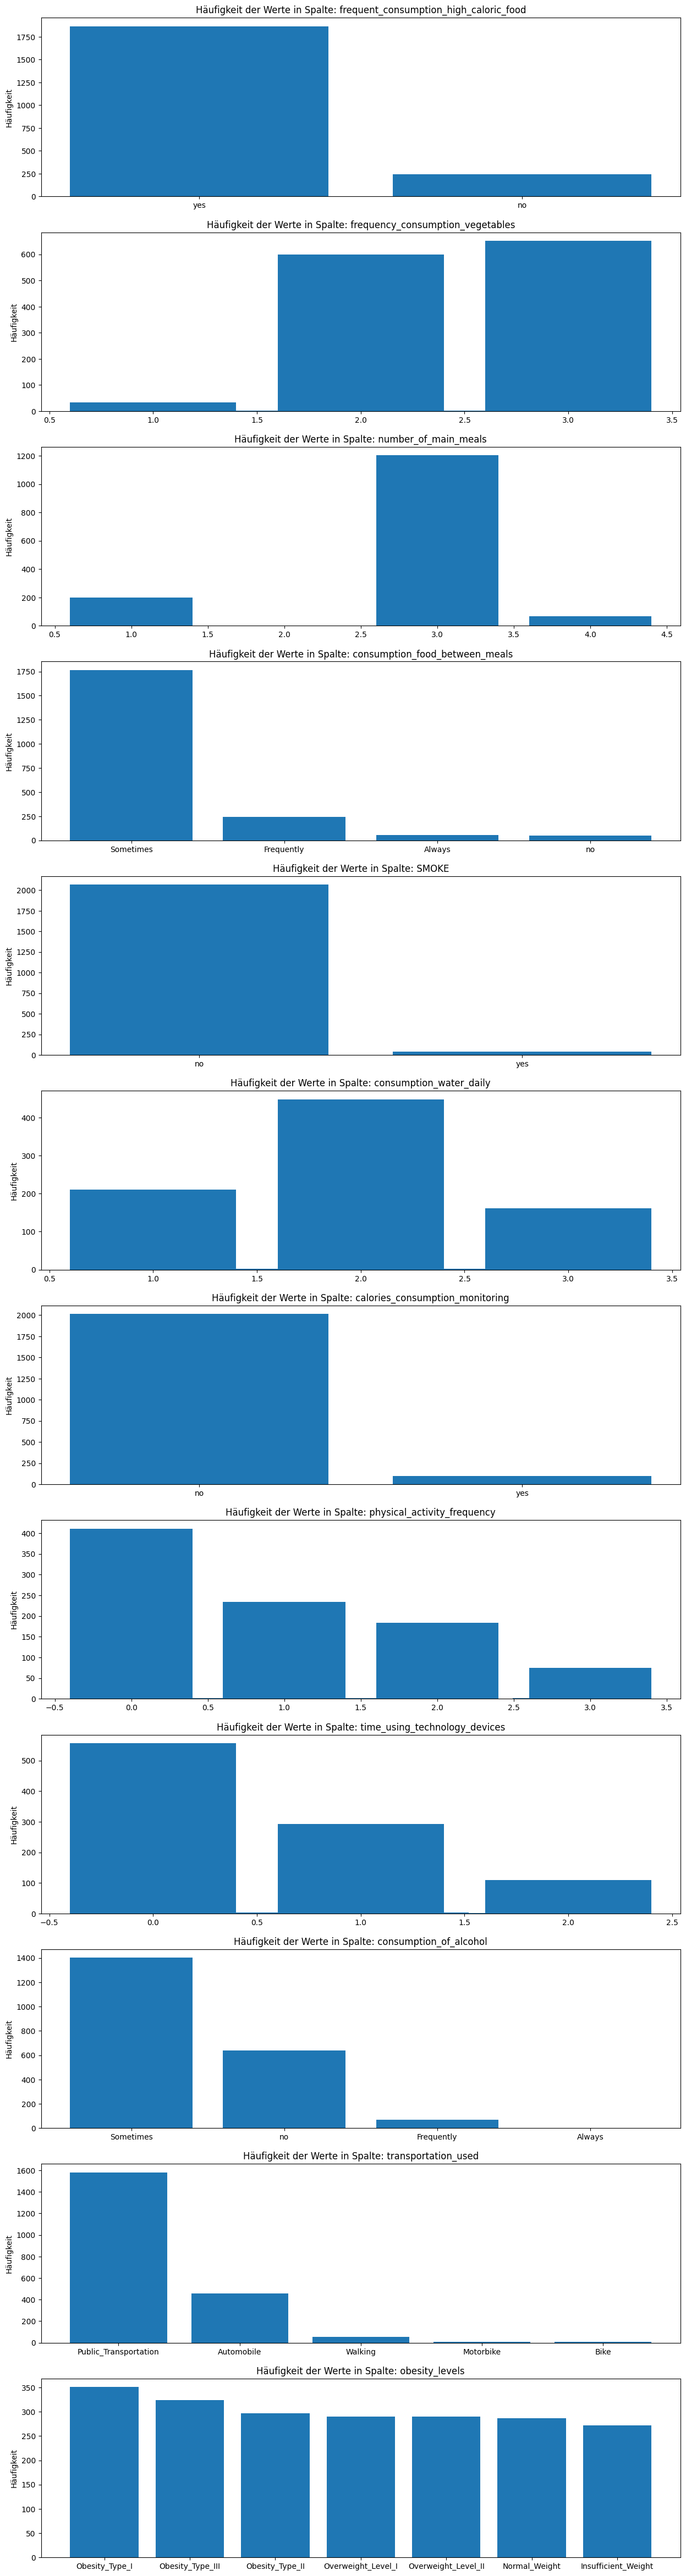

In [29]:
# Erstellen eines subplots für jede Spalte
fig, axs = plt.subplots(nrows=len(df_rename.columns), ncols=1, figsize=(15, 60))

# Iterieren über jede Spalte und Erstellen des Balkendiagramms
for i, column in enumerate(df_rename.columns):
    # Zählen der Häufigkeiten der Werte der aktuellen Spalte
    value_counts = df_rename[column].value_counts()

    # Erstellen des Diagramms für die aktuellen Spalte
    axs[i].bar(value_counts.index, value_counts.values)

    # Beschriften des Balkendiagramms
    axs[i].set_ylabel('Häufigkeit')
    axs[i].set_title(f'Häufigkeit der Werte in Spalte: {column}')

# Anzeigen der Diagramme
plt.show()

### Dem Balkendiagramm ist zu entnehmen, dass manche Inhalte des Datensatzes transformiert werden müssen.

In [30]:
# Float Werte bestimmter Zeilen in int umwandeln 
df_rename['frequency_consumption_vegetables'] = df_rename['frequency_consumption_vegetables'].astype(int)
df_rename['consumption_water_daily'] = df_rename['consumption_water_daily'].astype(int)
df_rename['physical_activity_frequency'] = df_rename['physical_activity_frequency'].astype(int)
df_rename['time_using_technology_devices'] = df_rename['time_using_technology_devices'].astype(int)
df_rename['number_of_main_meals'] = df_rename['number_of_main_meals'].astype(int)

# Ersetzen der int Werte durch Antwortmöglichkeit, die dem int Wert entspricht
df_rename['frequency_consumption_vegetables'] = df_rename['frequency_consumption_vegetables'].astype(str).str.strip().replace({"1": "Never", "2": "Sometimes", "3": "Always"})
df_rename['number_of_main_meals'] = df_rename['number_of_main_meals'].astype(str).str.strip().replace({"1": "Between 1 and 2", "2": "Between 1 and 2", "3": "Three", "4": "More than three"}) 
df_rename['consumption_water_daily'] = df_rename['consumption_water_daily'].astype(str).str.strip().replace({"1": "Less than a liter", "2": "Between 1 and 2L", "3": "More than 2L"})
df_rename['physical_activity_frequency'] = df_rename['physical_activity_frequency'].astype(str).str.strip().replace({"0": "I do not have", "1": "1 or 2 days", "2": "2 or 4 days", "3": "4 or 5 days"})
df_rename['time_using_technology_devices'] = df_rename['time_using_technology_devices'].astype(str).str.strip().replace({"0": "0-2 hours", "1": "3-5 hours", "2": "More than 5 hours"})

### Mit den transformierten Daten ergibt sich folgendes Balkendiagramm mit korrekten Werten

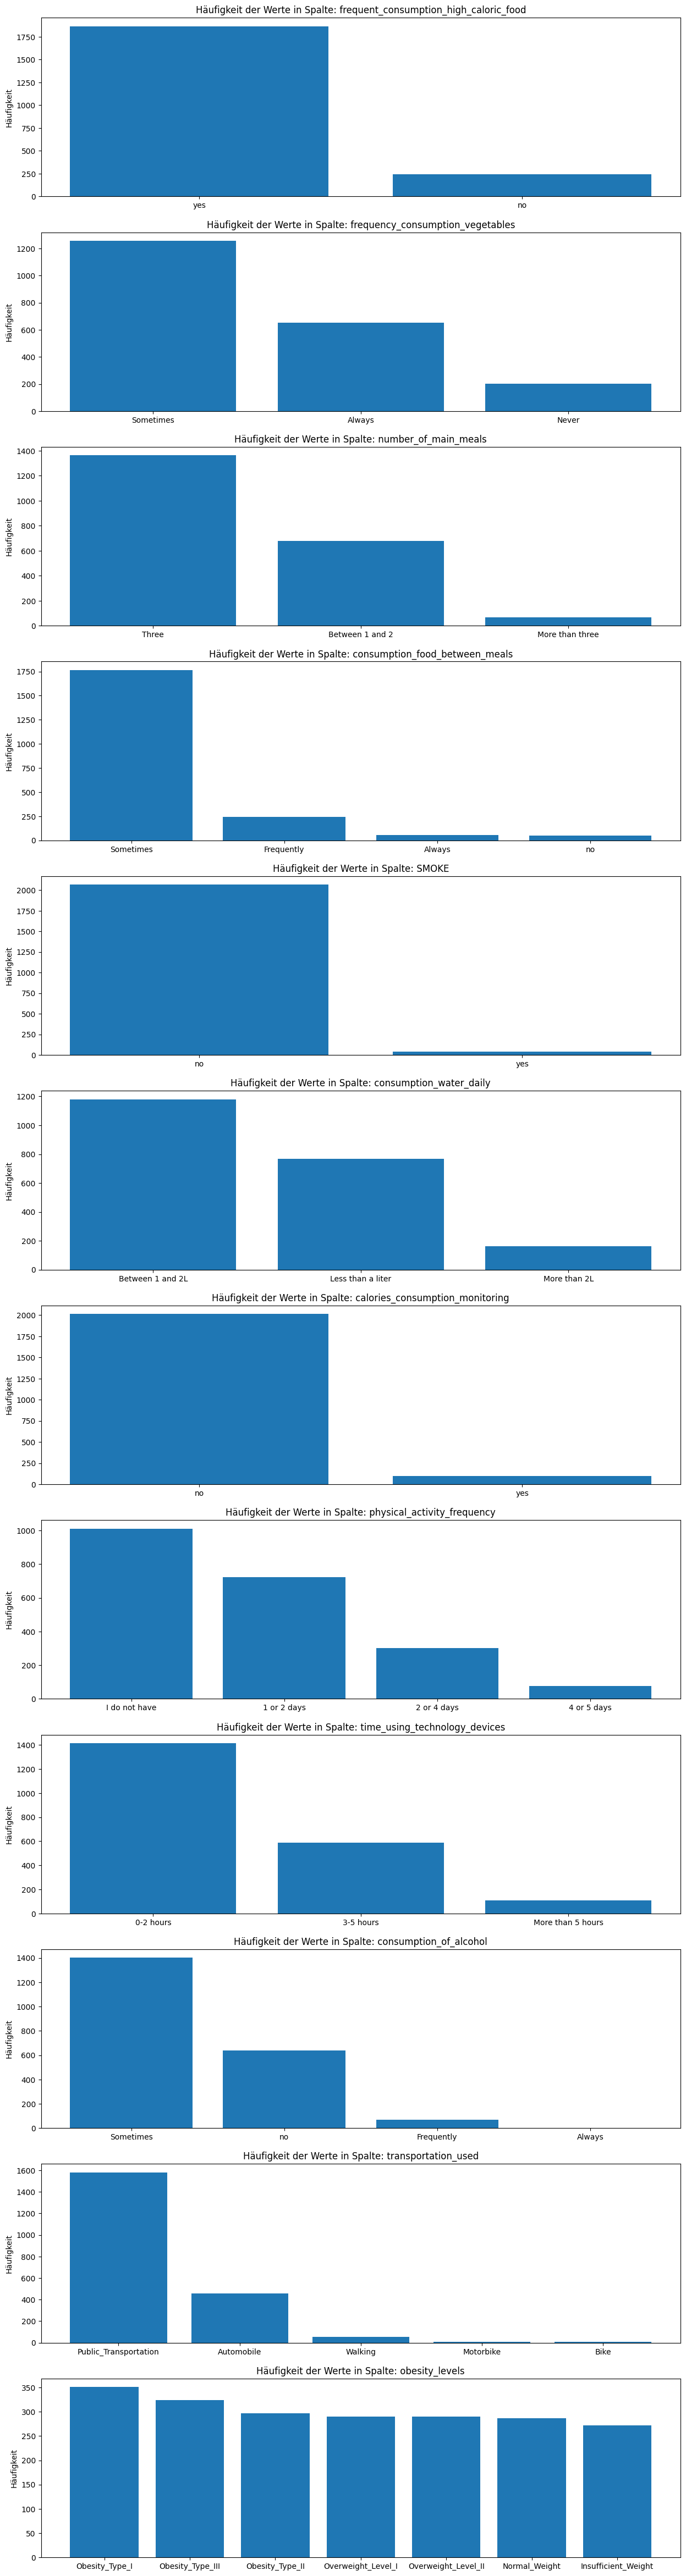

In [31]:
# Erstellen eines subplots für jede Spalte
fig, axs = plt.subplots(nrows=len(df_rename.columns), ncols=1, figsize=(15, 60))

# Iterieren über jede Spalte und Erstellen des Balkendiagramms
for i, column in enumerate(df_rename.columns):
    # Zählen der Häufigkeiten der Werte der aktuellen Spalte
    value_counts = df_rename[column].value_counts()

    # Erstellen des Diagramms für die aktuellen Spalte
    axs[i].bar(value_counts.index, value_counts.values)

    # Beschriften des Balkendiagramms
    axs[i].set_ylabel('Häufigkeit')
    axs[i].set_title(f'Häufigkeit der Werte in Spalte: {column}')

# Anzeigen der Diagramme
plt.show()

### Phi-Koeffizienten werden bezogen auf die obesity_levels berechnet. Dafür wird das ursprüngliche DataFrame in einem ersten Schritt in ein DataFrame mit binären Werten umgewandelt.

In [32]:
# One-Hot-Encoding -> Umwandlung in DataFrame mit Binären Werten
df_encoded = pd.get_dummies(df_rename, prefix=None)

# Ausgeben der ersten Werte
print(df_encoded.head())

   frequent_consumption_high_caloric_food_no  \
0                                       True   
1                                       True   
2                                       True   
3                                       True   
4                                       True   

   frequent_consumption_high_caloric_food_yes  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   frequency_consumption_vegetables_Always  \
0                                    False   
1                                     True   
2                                    False   
3                                     True   
4                                    False   

   frequency_consumption_vegetables_Never  \
0                                   False   
1                                   False   
2   

In [45]:
def phi_coefficient(df_encoded, target_variable):

    # Berechnen der Phi-Koeffizienten Matrix
    phi_matrix = df_encoded.phik_matrix()

    # Abspeichern der Phi-Koeffizienten, die auf die Zielvariable bezogen sind
    phi_coefficients = phi_matrix[target_variable].drop(target_variable)

    #Aufsteigende Sortierung der Phi-Koeffizienten
    sorted_phi_coefficients = phi_coefficients.sort_values(ascending=False)
    
    # Ausgeben der Phi-Koeffizienten
    print('\n' "Phi-Koeffizienten, die sich auf {} beziehen:".format(target_variable))
    print(sorted_phi_coefficients)

phi_coefficient(df_encoded, target_variable='obesity_levels_Obesity_Type_III')
phi_coefficient(df_encoded, target_variable='obesity_levels_Obesity_Type_II')
phi_coefficient(df_encoded, target_variable='obesity_levels_Obesity_Type_I')
phi_coefficient(df_encoded, target_variable='obesity_levels_Overweight_Level_I')
phi_coefficient(df_encoded, target_variable='obesity_levels_Overweight_Level_II')
phi_coefficient(df_encoded, target_variable='obesity_levels_Normal_Weight')
phi_coefficient(df_encoded, target_variable='obesity_levels_Insufficient_Weight')


Phi-Koeffizienten, die sich auf obesity_levels_Obesity_Type_III beziehen:
frequency_consumption_vegetables_Always            0.840365
frequency_consumption_vegetables_Sometimes         0.723481
number_of_main_meals_Three                         0.473074
consumption_of_alcohol_Sometimes                   0.451509
number_of_main_meals_Between 1 and 2               0.441882
consumption_of_alcohol_no                          0.419322
time_using_technology_devices_0-2 hours            0.401254
transportation_used_Public_Transportation          0.370144
time_using_technology_devices_3-5 hours            0.348491
transportation_used_Automobile                     0.335784
obesity_levels_Obesity_Type_I                      0.289794
consumption_food_between_meals_Sometimes           0.281930
obesity_levels_Obesity_Type_II                     0.262431
obesity_levels_Overweight_Level_II                 0.258776
obesity_levels_Overweight_Level_I                  0.258776
physical_activity_frequen

### Supervised Learning mit einem Entscheidungsbaum. Zuerst wird der Datensatz transformiert, sodass die das Modell damit arbeiten kann.

In [ ]:
# Spalte auswählen, die nicht codiert werden soll
column_to_exclude = 'obesity_levels'

# One-Hot-Encoding für alle Spalten außer der ausgewählten Spalte
df_decision_tree = pd.get_dummies(df.drop(column_to_exclude, axis=1))

# Füge die nicht codierte Spalte wieder hinzu
df_decision_tree[column_to_exclude] = df[column_to_exclude]

In [189]:
# obesity_levels ist die Zielvariable
features = df_decision_tree.drop('obesity_levels', axis=1)
labels = df_decision_tree['obesity_levels']

# Einteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Entscheidungsbaum-Modell mit Standardwerten für Parameter erstellen
model_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
model_dt.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
predictions = model_dt.predict(X_test)

# Evaluierung der Modellgenauigkeit
accuracy = accuracy_score(y_test, predictions)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.6548463356973995


### Random Forest

In [162]:
# Einteilung in Trainings- und Testdaten für Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features, labels, test_size=0.2, random_state=42)

# Random Forest-Modell erstellen
model_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
model_rf.fit(X_train_rf, y_train_rf)

# Vorhersagen auf den Testdaten für Random Forest
predictions_rf = model_rf.predict(X_test_rf)

# Evaluierung der Modellgenauigkeit für Random Forest
accuracy_rf = accuracy_score(y_test_rf, predictions_rf)
print("Genauigkeit des Random Forest-Modells:", accuracy_rf)

Genauigkeit des Random Forest-Modells: 0.6926713947990544


### Das Verändern der Hyperparameter soll die Genauigkeit erhöhen und Overfitting vermeiden

In [176]:
# Entscheidungsbaum-Modell mit angepassten Parametern erstellen
model_dt_adjusted = DecisionTreeClassifier(max_depth=27, min_samples_split=2, min_samples_leaf=1)
model_dt_adjusted.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
predictions = model_dt_adjusted.predict(X_test)

# Evaluierung der Modellgenauigkeit
accuracy = accuracy_score(y_test, predictions)
print("Genauigkeit des verbesserten Entscheidungsbaum-Modells:", accuracy)

# Random Forest-Modell mit angepassten Parametern erstellen
model_rf_adjusted = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=6, min_samples_leaf=2)
model_rf_adjusted.fit(X_train_rf, y_train_rf)

# Vorhersagen auf den Testdaten für Random Forest
predictions_rf = model_rf.predict(X_test_rf)

# Evaluierung der Modellgenauigkeit für Random Forest
accuracy_rf = accuracy_score(y_test_rf, predictions_rf)
print("Genauigkeit des verbesserten Random Forest-Modells:", accuracy_rf)

Genauigkeit des verbesserten Entscheidungsbaum-Modells: 0.6643026004728132
Genauigkeit des verbesserten Random Forest-Modells: 0.6926713947990544


### Eine feature Selection soll helfen die Genauigkeit zu verbessern und Overfitting zu vermeiden

In [127]:
# Entscheidungsbaum-Modell erstellen
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Feature Importance extrahieren
feature_importance = model.feature_importances_

# Einfluss der Merkmale ausgeben, absteigend sortiert
sorted_feature_importance = np.argsort(feature_importance)[::-1]
sorted_features = features.columns[sorted_feature_importance]

print("Feature Importance für Entscheidungsbaum (absteigend sortiert):")
print(dict(zip(sorted_features, sorted(feature_importance, reverse=True))))

Feature Importance für Entscheidungsbaum (absteigend sortiert):
{'frequency_consumption_vegetables_Always': 0.10990209242355067, 'consumption_of_alcohol_Sometimes': 0.05908208574420628, 'time_using_technology_devices_0-2 hours': 0.05890590860329133, 'transportation_used_Automobile': 0.05381367415120347, 'consumption_food_between_meals_Sometimes': 0.05291918735327554, 'transportation_used_Public_Transportation': 0.04946145210796293, 'number_of_main_meals_Three': 0.04394261168515488, 'consumption_water_daily_Less than a liter': 0.04076252028608841, 'consumption_of_alcohol_no': 0.04023227906032867, 'physical_activity_frequency_I do not have': 0.039743544558118155, 'number_of_main_meals_Between 1 and 2': 0.03691918150604066, 'frequent_consumption_high_caloric_food_no': 0.036649886147712744, 'physical_activity_frequency_1 or 2 days': 0.035175451112224435, 'consumption_food_between_meals_Frequently': 0.034956899678040276, 'time_using_technology_devices_3-5 hours': 0.033384023376221345, 'cons

In [128]:
# Die wichtigsten 9 Spalten werden in ein neues DataFrame gespeichert
selected_columns = [
    'frequency_consumption_vegetables_Always',
    'time_using_technology_devices_0-2 hours',
    'consumption_of_alcohol_Sometimes',
    'consumption_food_between_meals_Sometimes',
    'transportation_used_Automobile',
    'transportation_used_Public_Transportation',
    'number_of_main_meals_Three',
    'consumption_water_daily_Less than a liter',
    'physical_activity_frequency_I do not have',
    'obesity_levels'
]

# Neuen DataFrame nur mit den ausgewählten Spalten erstellen
df_selected_columns = df_decision_tree[selected_columns]

In [155]:
# features und labels definieren
features_selected = df_selected_columns.drop('obesity_levels', axis=1)
labels_selected = df_selected_columns['obesity_levels']

# Einteilung in Trainings- und Testdaten
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(features_selected, labels_selected, test_size=0.2, random_state=42)

# Entscheidungsbaum-Modell mit angepassten Parametern erstellen
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
predictions = model.predict(X_test)

# Evaluierung der Modellgenauigkeit
accuracy = accuracy_score(y_test, predictions)
print("Genauigkeit des verbesserten Entscheidungsbaum-Modells:", accuracy)

# Random Forest-Modell mit angepassten Parametern erstellen
model_rf = RandomForestClassifier()
model_rf.fit(X_train_rf, y_train_rf)

# Vorhersagen auf den Testdaten für Random Forest
predictions_rf = model_rf.predict(X_test_rf)

# Evaluierung der Modellgenauigkeit für Random Forest
accuracy_rf = accuracy_score(y_test_rf, predictions_rf)
print("Genauigkeit des verbesserten Random Forest-Modells:", accuracy_rf)

Genauigkeit des verbesserten Entscheidungsbaum-Modells: 0.6619385342789598
Genauigkeit des verbesserten Random Forest-Modells: 0.6903073286052009


### Die besten Modelle werden mit verschiedenen Zufallszahlen auf Stabilität getestet

In [182]:
# Neue Zufallszahl für die Aufteilung in Trainings- und Testdaten
new_random_state = 42

# Einteilung in Trainings- und Testdaten für Entscheidungsbaum
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features, labels, test_size=0.2, random_state=new_random_state)

# Vorhersagen auf den neuen Testdaten für Entscheidungsbaum
predictions_new = model.predict(X_test_new)

# Evaluierung der Modellgenauigkeit für Entscheidungsbaum mit neuen Testdaten
accuracy_new = accuracy_score(y_test_new, predictions_new)
print("Genauigkeit des Modells mit neuen Testdaten (Entscheidungsbaum):", accuracy_new)

# Einteilung in Trainings- und Testdaten für Random Forest mit neuen Zufallszahlen
X_train_rf_new, X_test_rf_new, y_train_rf_new, y_test_rf_new = train_test_split(features, labels, test_size=0.2, random_state=new_random_state)

# Vorhersagen auf den neuen Testdaten für Random Forest
predictions_rf_new = model_rf.predict(X_test_rf_new)

# Evaluierung der Modellgenauigkeit für Random Forest mit neuen Testdaten
accuracy_rf_new = accuracy_score(y_test_rf_new, predictions_rf_new)
print("Genauigkeit des Random Forest-Modells mit neuen Testdaten:", accuracy_rf_new)


Genauigkeit des Modells mit neuen Testdaten (Entscheidungsbaum): 0.8132387706855791
Genauigkeit des Random Forest-Modells mit neuen Testdaten: 0.6926713947990544
